In [25]:
import sys
import logging

so = open("data.log", 'w', 10)
sys.stdout.echo = so
sys.stderr.echo = so

get_ipython().log.handlers[0].stream = so
get_ipython().log.setLevel(logging.INFO)
import pandas as pd
import numpy as np
import os
# import sys
import soundfile as sf

import multiprocessing
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor


import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [50]:
Ravdess = "D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24"
Crema = "D:\\Projects\\Speech Emotion Reconition\\crema\\AudioWAV"
Tess = "D:\Projects\Speech Emotion Reconition\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data"
Savee = "D:\Projects\Speech Emotion Reconition\savee\ALL"

In [38]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        
    
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(Ravdess, dir, file))
       
    
emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])
path_df = pd.DataFrame(file_path, columns = ['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis = 1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6:'fear', 7: 'disgust', 8: 'surprise'}, inplace = True)
Ravdess_df.head()
print (file_path)

['D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-01-01-01.wav', 'D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-01-02-01.wav', 'D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-02-01-01.wav', 'D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-02-02-01.wav', 'D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-02-01-01-01-01.wav', 'D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-02-01-01-02-01.wav', 'D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-02-01-02-01-01.wav', 'D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\Actor_01\\03-01-02-01-02-02-01.wav', 'D:\\Projects\\Speech Emotion Reconition\\Ravdess\\audio_speech_actors_01-24\\A

In [68]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(os.path.join(Crema, file))
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] =='DIS':
        file_emotion.append('disgust')
    elif part[2] =='FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns = ['Emotions'])

path_df = pd.DataFrame(file_path, columns = ['Path'])
crema_df = pd.concat([emotion_df , path_df], axis = 1)
crema_df.head()


Emotions                                               Path
0    angry  D:\Projects\Speech Emotion Reconition\crema\Au...
1  disgust  D:\Projects\Speech Emotion Reconition\crema\Au...
2     fear  D:\Projects\Speech Emotion Reconition\crema\Au...
3    happy  D:\Projects\Speech Emotion Reconition\crema\Au...
4  neutral  D:\Projects\Speech Emotion Reconition\crema\Au...

In [73]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        
        if part == 'ps':
            file_emotion.append('surprise')
        else:
             file_emotion.append(part)
        file_path.append(os.path.join(Tess, dir, file))

emotion_df = pd.DataFrame(file_emotion , columns = ['Emotions'])

path_df = pd.DataFrame (file_path, columns = ['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis = 1)
Tess_df.head()
print (file_path)

['D:\\Projects\\Speech Emotion Reconition\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav', 'D:\\Projects\\Speech Emotion Reconition\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav', 'D:\\Projects\\Speech Emotion Reconition\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav', 'D:\\Projects\\Speech Emotion Reconition\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav', 'D:\\Projects\\Speech Emotion Reconition\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav', 'D:\\Projects\\Speech Emotion Reconition\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_beg_angry.wav', 'D:\\Projects\\Speech Emotion Reconition\\TESS Toronto emotional speech set d

In [74]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(os.path.join(Savee, file))
    part = file.split('_')[1]
    ele = part[:-6]
    
    if ele == 'a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
emotion_df = pd.DataFrame(file_emotion , columns = ['Emotions'])
            
path_df = pd.DataFrame(file_path, columns = ['Path'])
Savee_df = pd.concat([emotion_df , path_df], axis = 1)
Savee_df.head()


Emotions                                               Path
0    angry  D:\Projects\Speech Emotion Reconition\savee\AL...
1    angry  D:\Projects\Speech Emotion Reconition\savee\AL...
2    angry  D:\Projects\Speech Emotion Reconition\savee\AL...
3    angry  D:\Projects\Speech Emotion Reconition\savee\AL...
4    angry  D:\Projects\Speech Emotion Reconition\savee\AL...

In [76]:
data_path = pd.concat([Ravdess_df, crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv", index = False)
data_path.head()

Emotions                                               Path
0  neutral  D:\Projects\Speech Emotion Reconition\Ravdess\...
1  neutral  D:\Projects\Speech Emotion Reconition\Ravdess\...
2  neutral  D:\Projects\Speech Emotion Reconition\Ravdess\...
3  neutral  D:\Projects\Speech Emotion Reconition\Ravdess\...
4     calm  D:\Projects\Speech Emotion Reconition\Ravdess\...

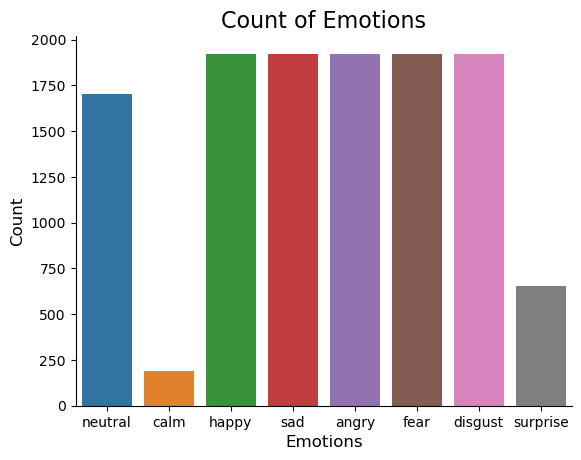

In [77]:
plt.title('Count of Emotions', size = 16)
sns.countplot(x = 'Emotions', data = data_path)
plt.ylabel('Count', size = 12)
plt.xlabel('Emotions', size = 12)
sns.despine (top = True, right= True, left = False, bottom = False)
plt.show()

In [78]:
def create_waveplot (data, sr, e):
    plt.figure(figsize = (10,3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size = 15)
    
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# stft(short term fourier transform) represents signals in the time-frequency domain by computing discrete fourier transformation over short overlapping windows.
#stft function converts the data into short term fourier transform 
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize = (12,3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size = 15)
    librosa.display.specshow(Xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
    
    plt.colorbar()

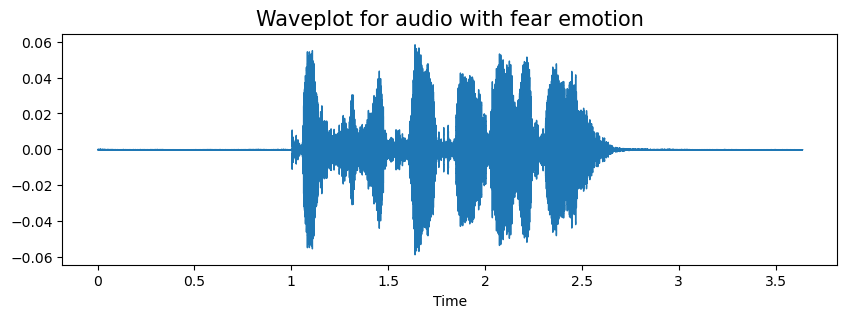

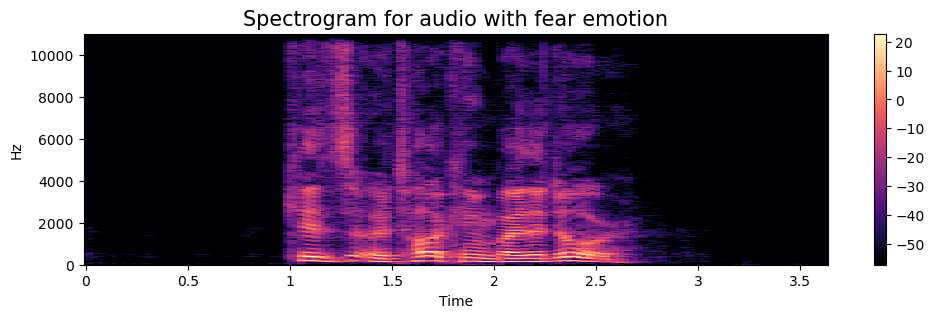

In [79]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path) #sampling rate is the number of samples taken per second)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

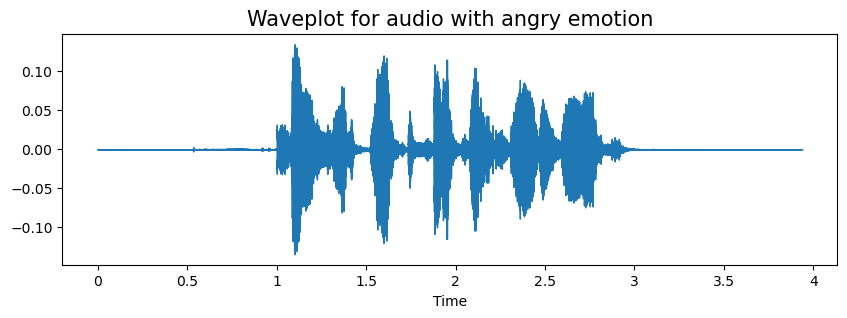

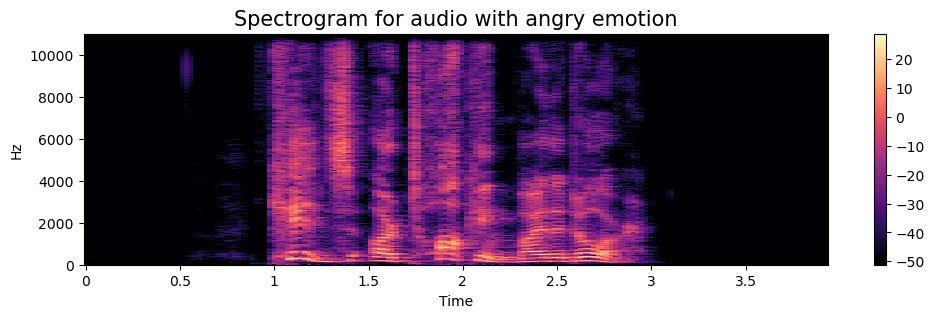

In [80]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

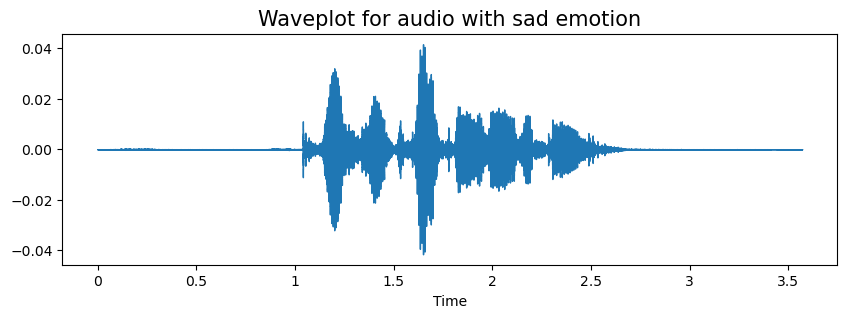

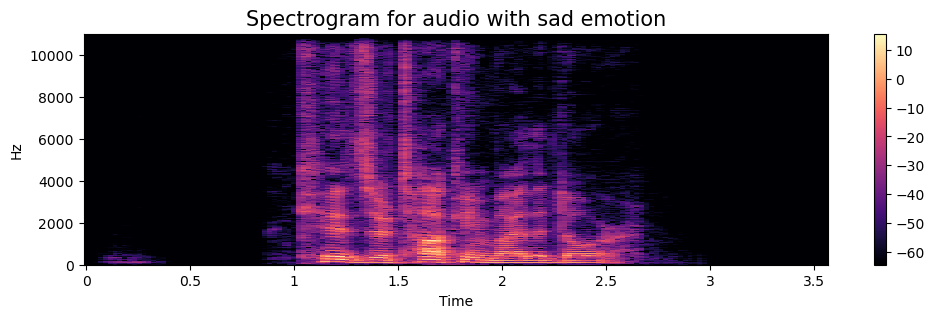

In [81]:
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram (data, sampling_rate, emotion)
Audio(path)

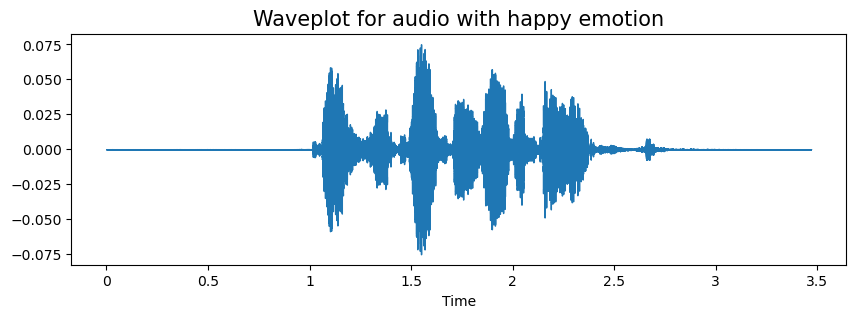

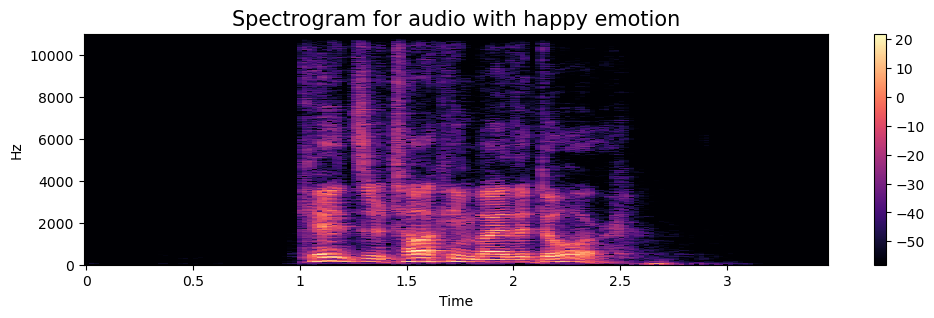

In [82]:
emotion = 'happy'
path= np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [83]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data+noise_amp*np.random.normal(size = data.shape[0])
    return data

def stretch (data):
    return librosa.effects.time_stretch(data, rate = 0.8)

def shift (data):
    shift_range = int(np.random.uniform(low= -5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch (data, sampling_rate, pitch_factor = 0.7):
    n_steps = int(pitch_factor*12)
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = n_steps)


path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)


1. Simple Audio

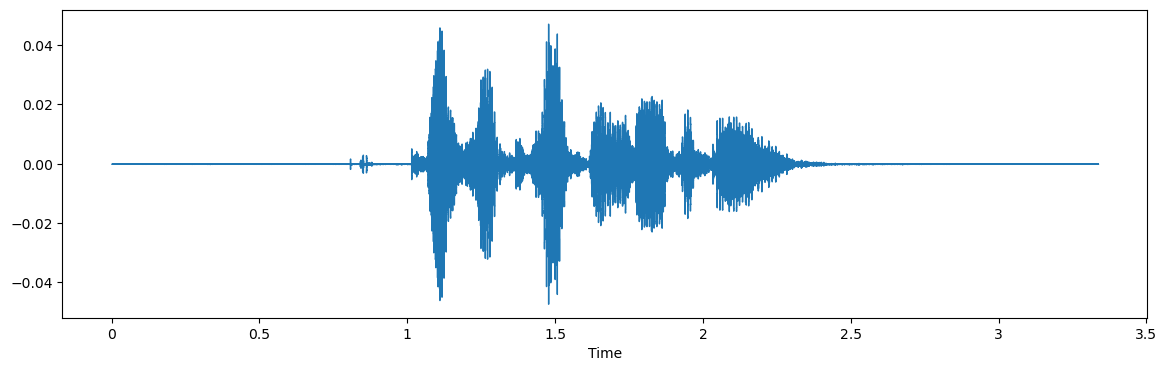

In [84]:
plt.figure(figsize = (14,4))
librosa.display.waveshow(y= data, sr= sample_rate)
Audio(path)

2. Noise Injection

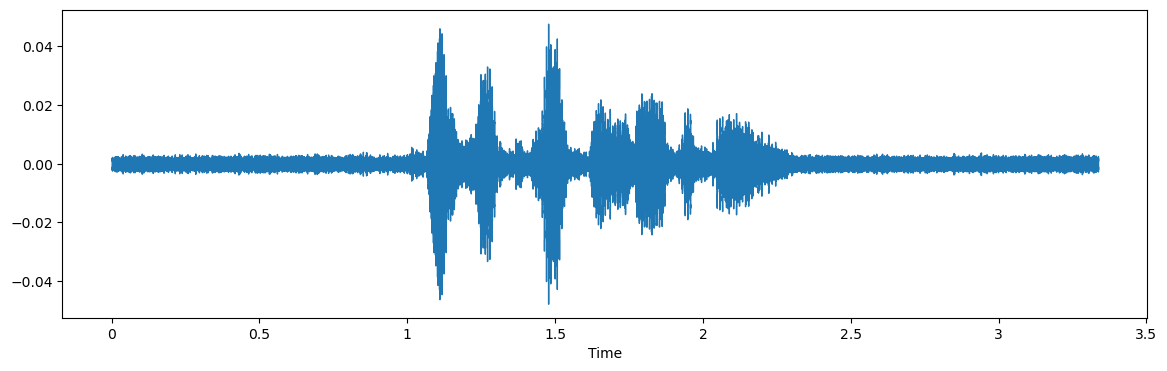

In [85]:
x = noise (data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x , rate = sample_rate)

3. Stretching

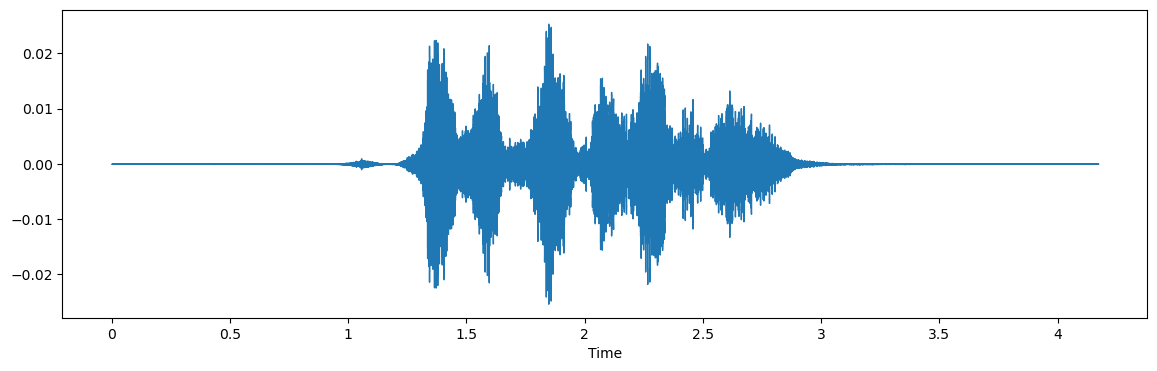

In [86]:
x= stretch(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y=x, sr = sample_rate)
Audio(x, rate = sample_rate)

4. Shifting 

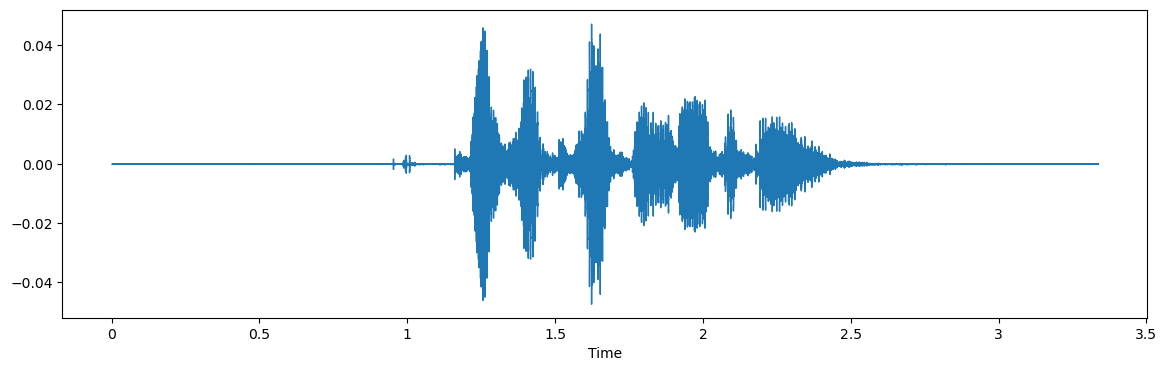

In [87]:
x = shift(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x , rate= sample_rate)

5. pitching 

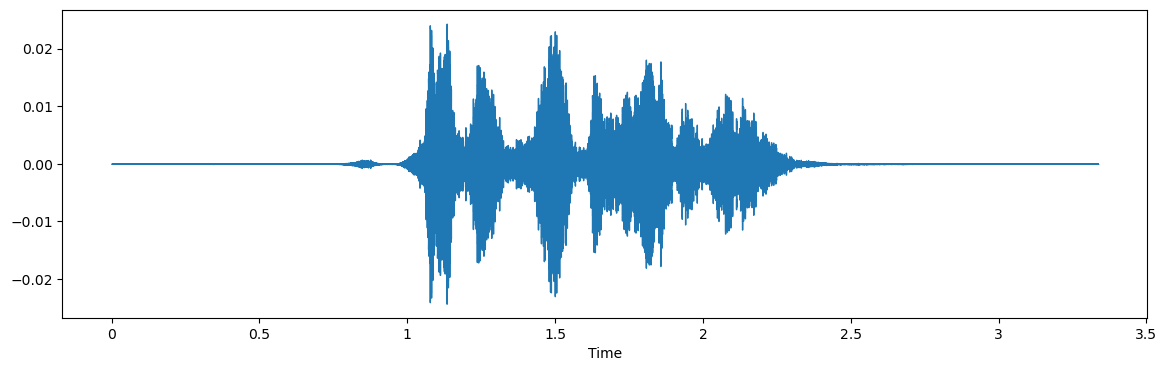

In [88]:
x = pitch(data, sampling_rate)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y =x, sr= sample_rate)
Audio(x, rate = sample_rate)

# Feature selection

In [89]:
def extract_features(data):
    #zero crossing rate: The rate of sign-changes of signal during the duration of a particular frame
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y = data).T, axis = 0)
    result = np.hstack((result,zcr)) #stacking horizontally
    
    #chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.mfcc(y = data, sr = sample_rate).T, axis = 0)
    result = np.hstack((result, chroma_stft))
    
    #MFCCs Mel Frequency Ceptral Coefficients from a Ceptral representation where the frequency bamds are not linear but distributed according to mel-scale
    
    mfcc = np.mean(librosa.feature.mfcc(y = data, sr = sample_rate).T, axis = 0)
    result = np.hstack((result,mfcc))
    
    #Root mean Square Value
    rms= np.mean(librosa.feature.rms(y = data).T, axis = 0)
    result = np.hstack((result , rms))
    
    # MelSpectrogram 
    mel = np.mean(librosa.feature.melspectrogram(y = data, sr = sample_rate).T, axis = 0)
    result = np.hstack((result, mel))
    
    return result



In [90]:
def get_features(path):
    #duration and offset are used to take care of the no audio in the start and the end of each of the audio files seen above.
    data, sample_rate = librosa.load(path, duration = 2.5, offset = 0.6)
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))
    
    #data with stretching and pitching
    new_data = stretch (data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))
    
    return result

In [91]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [92]:
len (X), len (Y), data_path.Path.shape


(36486, 36486, (12162,))

In [93]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index = False)
Features.head()

0           1          2         3          4          5          6  \
0  0.321275 -645.880737  72.619637  0.841305  16.399446  10.241591   0.653901   
1  0.273930 -585.905193  59.950034  1.147929  13.454584   8.203201  -0.332079   
2  0.186035 -702.078613  57.920197 -5.118683   9.518199 -15.594826 -13.779827   
3  0.293566 -634.663269  72.324066 -2.998578  20.209740  10.674217  -1.151011   
4  0.299325 -468.335634  34.017042  7.921178  11.843006   6.181333  -1.572112   

           7         8          9  ...       161       162       163  \
0  -4.328002 -4.258932 -14.575824  ...  0.000004  0.000003  0.000002   
1  -4.778286 -6.767441 -13.803980  ...  0.000005  0.000004  0.000003   
2 -10.832221 -5.800511   4.028834  ...  0.000005  0.000006  0.000004   
3  -2.813592 -7.923956 -16.231958  ...  0.000007  0.000007  0.000007   
4  -2.946901 -7.595142 -10.357051  ...  0.000033  0.000033  0.000034   

        164       165       166       167           168           169   labels  
0  0.000002  0.000005  0.000008  0.000007  5.051210e-06  4.245834e-07  neutral  
1  0.000003  0.000006  0.000009  0.000008  5.488296e-06  8.656257e-07  neutral  
2  0.000004  0.000003  0.000002  0.000001  4.575180e-07  2.928348e-08  neutral  
3  0.000007  0.000012  0.000010  0.000011  5.543237e-06  4.254087e-07  neutral  
4  0.000033  0.000040  0.000038  0.000039  3.231455e-05  2.731663e-05  neutral  

[5 rows x 171 columns]

Preparation


In [124]:
X = Features.iloc[:,:-1].values
Y = Features['labels'].values

In [125]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [126]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 170), (27364, 8), (9122, 170), (9122, 8))

In [127]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 170), (27364, 8), (9122, 170), (9122, 8))

In [128]:
#data compatible to model
x_train = np.expand_dims(x_train, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 170, 1), (27364, 8), (9122, 170, 1), (9122, 8))

Modelling

In [129]:
model = Sequential()
model.add(Conv1D(256, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu', input_shape = (x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size = 5, strides = 2))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 170, 256)          1536      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 83, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 83, 256)           327936    
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 42, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 42, 128)           163968    
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 21, 128)         

In [130]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])


Epoch 1/50
428/428 [==============================] - 45s 102ms/step - loss: 1.7554 - accuracy: 0.2820 - val_loss: 1.6057 - val_accuracy: 0.3463 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 42s 99ms/step - loss: 1.5943 - accuracy: 0.3530 - val_loss: 1.5520 - val_accuracy: 0.3700 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 46s 108ms/step - loss: 1.4888 - accuracy: 0.4042 - val_loss: 1.3873 - val_accuracy: 0.4386 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 47s 109ms/step - loss: 1.4074 - accuracy: 0.4401 - val_loss: 1.3531 - val_accuracy: 0.4749 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 47s 109ms/step - loss: 1.3547 - accuracy: 0.4657 - val_loss: 1.2795 - val_accuracy: 0.5004 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 47s 109ms/step - loss: 1.3064 - accuracy: 0.4809 - val_loss: 1.2592 - val_accuracy: 0.5052 - lr: 0.0010
Epoch 7/50
428/428 [==============================] -

286/286 [==============================] - 7s 23ms/step - loss: 1.1680 - accuracy: 0.5872
Accuracy of our model on test data :  58.71519446372986 %


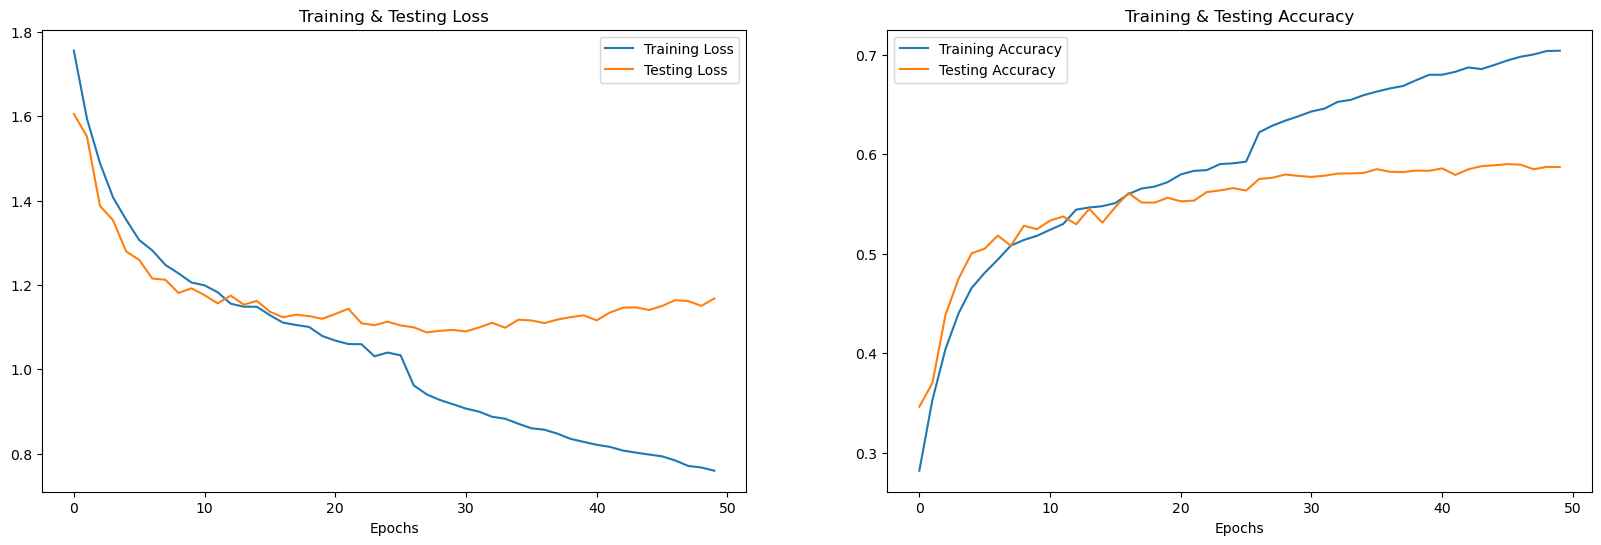

In [131]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [132]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 7s 22ms/step


In [133]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4             fear          fear
5              sad          fear
6             fear         happy
7            happy         happy
8          disgust           sad
9          neutral           sad

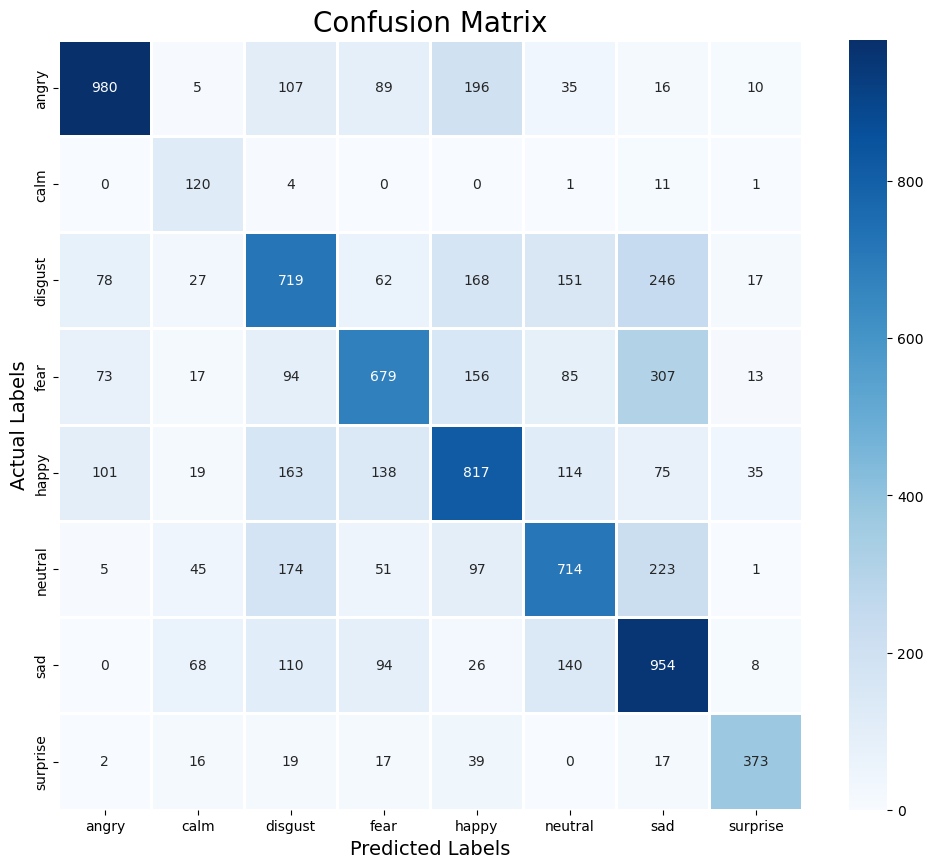

In [134]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.79      0.68      0.73      1438
        calm       0.38      0.88      0.53       137
     disgust       0.52      0.49      0.50      1468
        fear       0.60      0.48      0.53      1424
       happy       0.55      0.56      0.55      1462
     neutral       0.58      0.55      0.56      1310
         sad       0.52      0.68      0.59      1400
    surprise       0.81      0.77      0.79       483

    accuracy                           0.59      9122
   macro avg       0.59      0.64      0.60      9122
weighted avg       0.60      0.59      0.59      9122



Accuracy of model = 59%